# Exploratory Data Analysis

In [21]:
# Installation of the modules from the notebook
%pip install nltk
%pip install pandas numpy matplotlib seaborn
%pip install kagglehub[pandas-datasets]

# ====================================================================
# IMPORT OF BOOKSTORES 

# # Only run if they are not installed 
# # %pip install pandas numpy matplotlib seaborn nltk kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import re
from collections import Counter

# Download the dataset from Kaggle
import kagglehub
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords', quiet=True) 
ENGLISH_STOPWORDS = set(stopwords.words('english'))

# ====================================================================
# ENVIRONMENT CONFIGURATION

sns.set_style('whitegrid')
sns.set_palette('viridis') # Una paleta de colores limpia y moderna
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 12 # Aumentado ligeramente para mayor legibilidad
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 150) # Aumentado el ancho de columna

print("\nImported libraries and configured environment")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Imported libraries and configured environment


In [22]:
# ====================================================================
# STEP 1: DATA UPLOAD

# Download latest version
path = kagglehub.dataset_download("mrmorj/hate-speech-and-offensive-language-dataset")

print("Dataset downloaded successfully ")
print(f"Location: {path}\n")

# Find and upload the CSV file
csv_file = [f for f in os.listdir(path) if f.endswith('csv')][0]

# Try opening the file: .csv. If it can't (usually because of accents or strange characters), it doesn't stop and reopen it using a special setting (Latin-1) to read all of those characters correctly. 
# To immediately convert it to a Pandas DataFrame.
try:
    df = pd.read_csv(f"{path}/{csv_file}")
except:
    df = pd.read_csv(f"{path}/{csv_file}", encoding='latin-1')

print(f"Dimensions: {df.shape[0]} Rows, {df.shape[1]} Columns ")


Dataset downloaded successfully 
Location: C:\Users\alexi\.cache\kagglehub\datasets\mrmorj\hate-speech-and-offensive-language-dataset\versions\1

Dimensions: 24783 Rows, 7 Columns 


In [23]:
# ====================================================================
# STEP 2: INITIAL INSPECTION

print("\n" + "="*80)
print("2. INSPECTION OF THE DATAFRAME STRUCTURE\n")
print(" First 5 Rows\n")
display(df.head())
print(" Last 5 Rows\n")
display(df.tail())
print(" General Information\n")
df.info()
print("\nDataframe Columns :\n")


for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col:30s} | Type: {str(df[col].dtype):15s} | Unique: {df[col].nunique():,}")


2. INSPECTION OF THE DATAFRAME STRUCTURE

 First 5 Rows



,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


 Last 5 Rows



,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
24778,25291,3,0,2,1,1,"you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8230;. Now, mine? Bible scriptures and hymns&#8221;"
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy"
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies
24782,25296,3,0,0,3,2,"~~Ruffled | Ntac Eileen Dahlia - Beautiful color combination of pink, orange, yellow &amp; white. A Coll http://t.co/H0dYEBvnZB"


 General Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB

Dataframe Columns :

 1. Unnamed: 0                     | Type: int64           | Unique: 24,783
 2. count                          | Type: int64           | Unique: 5
 3. hate_speech                    | Type: int64           | Unique: 8
 4. offensive_language             | Type: int64           | Unique: 10
 5. neither                        | Type: int64           | Unique: 10
 6. 

In [24]:
# 2.1 ANALYSIS OF MISSING VALUES (CRUCIAL)
print("\n" + "-"*40 + "\nANALYSIS OF MISSING VALUES (NULLS)")
missing_data = df.isnull().sum()
if missing_data.sum() == 0:
    print("\nNo null values found")
else:
    missing_percentage = (missing_data / len(df) * 100).round(2)
    missing_info = pd.DataFrame({'Total Missing': missing_data, 'Percent (%)': missing_percentage})
    display(missing_info[missing_info['Total Missing'] > 0])


----------------------------------------
ANALYSIS OF MISSING VALUES (NULLS)

No null values found


In [25]:
# ====================================================================
# STEP 3: DATA CLEANING AND TRANSFORMATION

print("\n" + "="*80)
print("3.CLEANING AND TRANSFORMATION\n")


# 3.1 Removal of Redundant Column
df = df.drop('Unnamed: 0', axis=1)
print(" Column 'Unnamed: 0' (Duplicated index) removed.")

# 3.2 Label to Text Mapping (Legibility)
# The original column ('class') uses numbers (0, 1, 2) to classify tweets. 
# Humans understand words better. This code creates a new column ('class_label') 
# where the numbers are translated into their names: 0 becomes 'Hate Speech' 1 becomes 'Offensive Language' 2 becomes 'Neither'

class_mapping = {0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'}
df['class_label'] = df['class'].map(class_mapping)
print(" 'class_label' column created with text tags.")

# 3.3 Text Cleaning Function (OPTIMIZED with Stopwords)
# Defines a function called clean_text_optimized that purifies and standardizes the text of each tweet.
# The objective is to create a new column ('clean_tweet') that only contains the keywords, in lower case 
# without special characters, links, etc. The column is also created: text_length: It is the number of 
# characters in the original tweet, a useful metric for analyzing the brevity or complexity of the message. 
# Which is essential for a Machine Learning model to analyze and classify the text effectively.

def clean_text_optimized(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    # Stopwords filter
    # Purification: They filter the word list of each tweet to eliminate two types of "noise": Common words
    # (stopwords like "the", "is", "a"). Any word that has only one letter (noise or errors). 
    # Reconstruction: They put the purified words back together into a single clean text string ('clean_tweet'), ready for use by the Machine Learning model.
    
    words = [word for word in words if word not in ENGLISH_STOPWORDS and len(word) > 1]
    return ' '.join(words)
    # Take each tweet from the 'tweet' column and apply all the deep cleanup you defined in the clean_text_optimized function.
    # The result of this process (the text free of stopwords, links and noise) is saved in the new column called 'clean_tweet'
df['clean_tweet'] = df['tweet'].apply(clean_text_optimized)
# Measures the number of characters (letters, spaces, etc.) of each original tweet in the 'tweet' column. This number is saved in the new 'text_length' column.
df['text_length'] = df['tweet'].astype(str).apply(len) 
# Your dataframe now has two new columns ready for analysis: one with the clean and essential text (clean_tweet) and another with its length number (text_length)
    
# Displays a success message on the screen to confirm that the 'clean_tweet' column (the clean text) was created successfully.
print("\n'clean_tweet' column created (with Stopwords removed).")

# Displays a small table (the first 3 rows) with only three columns: 'tweet': The original untouched text. 
# 'clean_tweet': The text already purified and ready for analysis. 'text_length': The number of characters in the original tweet.
display(df[['tweet', 'clean_tweet', 'text_length']].head(3))



3.CLEANING AND TRANSFORMATION

 Column 'Unnamed: 0' (Duplicated index) removed.
 'class_label' column created with text tags.

'clean_tweet' column created (with Stopwords removed).


,tweet,clean_tweet,text_length
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,rt woman shouldnt complain cleaning house amp man always take trash,140
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt boy dats coldtyga dwn bad cuffin dat hoe st place,85
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,rt dawg rt ever fuck bitch start cry confused shit,120



4. UNIVARIATE ANALYSIS (CLASS DISTRIBUTION AND LENGTH)

Class Distribution:


,Count,Percentage
class_label,,
Offensive Language,19190,77.43%
Neither,4163,16.8%
Hate Speech,1430,5.77%


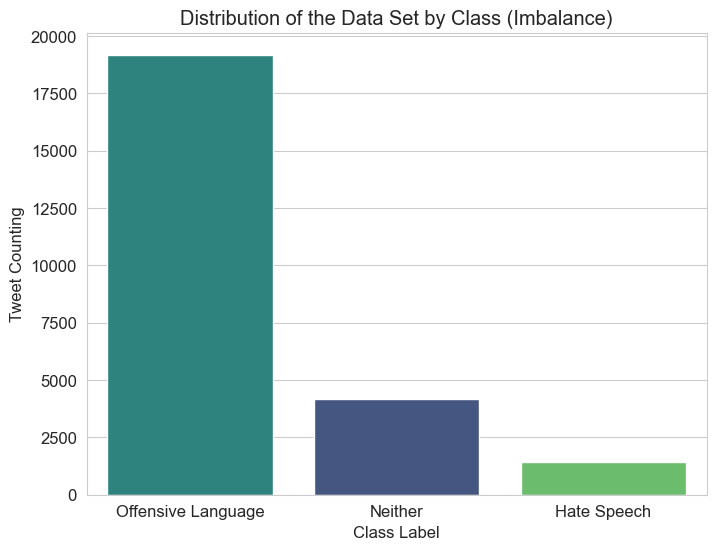


Conclusion: There is an extreme class imbalance, dominated by 'Offensive Language'.

----------------------------------------
Original Tweet Length Statistics (Characters)
count    24783.000000
mean        85.436065
std         41.548238
min          5.000000
25%         52.000000
50%         81.000000
75%        119.000000
max        754.000000


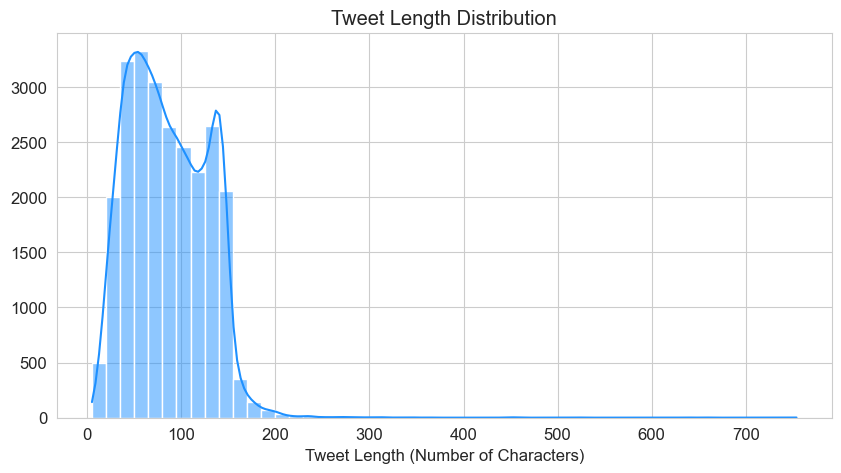

In [26]:
# ====================================================================
# STEP 4: UNIVARIATE ANALYSIS

print("\n" + "="*80)
print("4. UNIVARIATE ANALYSIS (CLASS DISTRIBUTION AND LENGTH)\n")


# 4.1 Distribución de Clases (Tabla y Visualización)
class_distribution = pd.DataFrame({
    'Count': df['class_label'].value_counts(),
    'Percentage': (df['class_label'].value_counts(normalize=True) * 100).round(2).astype(str) + '%'
})
print("Class Distribution:")
display(class_distribution)

plt.figure(figsize=(8, 6))
sns.countplot(x='class_label', data=df, order=class_distribution.index, palette='viridis',  hue='class_label', legend=False)
plt.title('Distribution of the Data Set by Class (Imbalance)')
plt.xlabel('Class Label')
plt.ylabel('Tweet Counting')
plt.xticks(rotation=0)
plt.show()

print("\nConclusion: There is an extreme class imbalance, dominated by 'Offensive Language'.")

# 4.2 Distribución de Longitud de Texto
print("\n" + "-"*40 + "\nOriginal Tweet Length Statistics (Characters)")
print(df['text_length'].describe().to_string())

plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=50, kde=True, color='dodgerblue')
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length (Number of Characters)')
plt.ylabel('')
plt.show()



 5. KEY BIVARIATE ANALYSIS (LENGTH VS CLASS)


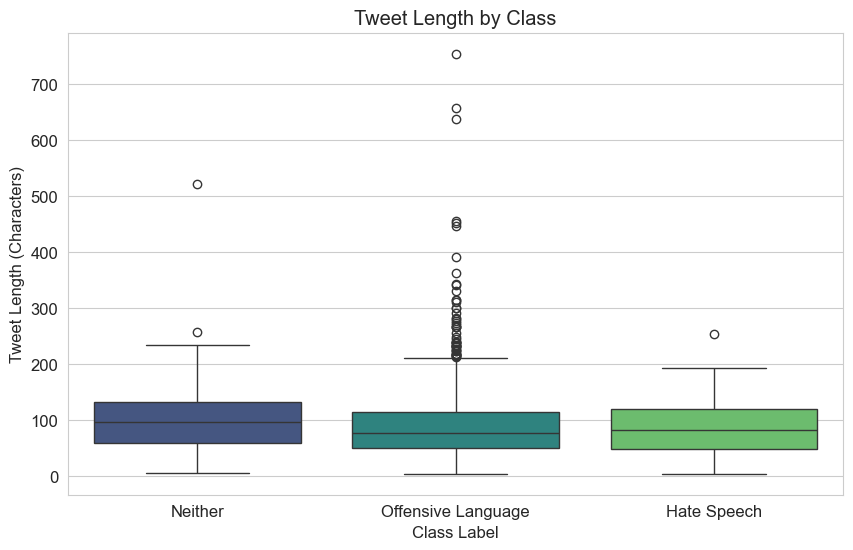

 Conclusion: Tweets classified as 'Neither' appear to have a more compact distribution and possibly a slightly different median length than the other two classes, which are more dispersed.
The Offensive Language class features a massive number of outliers. This means that although the average offensive tweet is short, there is a significant group of offensive messages
that are extremely long (exceeding 700 characters), indicating the presence of detailed conversations or offensive threads.
Which indicates that length alone does not help distinguish between Offensive Language and Hate Speech.
Offensive Language and Hate Speech They are shorter on average: Their medians are closer to 80-85 characters,
The length of the tweet is a useful clue to separate Neither (long) messages from offensive/hate (short) messages. However, it is useless to differentiate between offensive language and hate speech.


In [27]:
# ====================================================================
# STEP 5: KEY BIVARIATE ANALYSIS (LENGTH VS CLASS)

print("\n" + "="*80)
print(" 5. KEY BIVARIATE ANALYSIS (LENGTH VS CLASS)")


plt.figure(figsize=(10, 6))
# Boxplot es el mejor para comparar distribuciones entre grupos
sns.boxplot(x='class_label', y='text_length', data=df, hue='class_label', palette='viridis', legend=False)
plt.title('Tweet Length by Class')
plt.xlabel('Class Label')
plt.ylabel('Tweet Length (Characters)')
plt.show()

print(" Conclusion: Tweets classified as 'Neither' appear to have a more compact distribution and possibly a slightly different median length than the other two classes, which are more dispersed.")
print("The Offensive Language class features a massive number of outliers. This means that although the average offensive tweet is short, there is a significant group of offensive messages\nthat are extremely long (exceeding 700 characters), indicating the presence of detailed conversations or offensive threads.")
print("Which indicates that length alone does not help distinguish between Offensive Language and Hate Speech.")
print("Offensive Language and Hate Speech They are shorter on average: Their medians are closer to 80-85 characters,")
print("The length of the tweet is a useful clue to separate Neither (long) messages from offensive/hate (short) messages. However, it is useless to differentiate between offensive language and hate speech.")


6. TEXT ANALYSIS: GLOBAL FREQUENCY AND BY CLASS (WITHOUT STOPWORDS)


 GLOBAL FREQUENCY:
--------------------------------------------------------------------------------
Top 20 most frequent words:


,Word,Frequency
0,bitch,8222
1,rt,7634
2,bitches,3080
3,like,2771
4,hoes,2366
5,pussy,2097
6,im,2089
7,hoe,1908
8,dont,1781
9,ass,1567


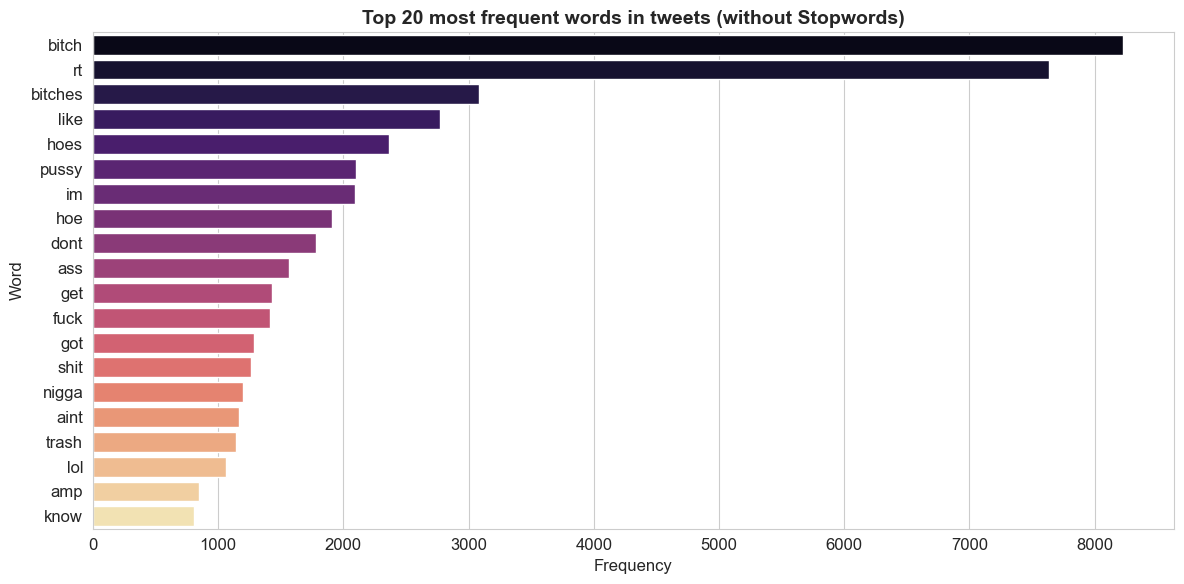


 FREQUENCY PER CLASS:

 Class: Neither
--------------------------------------------------------------------------------


,Word,Frequency
0,rt,1315
1,trash,684
2,like,301
3,bird,292
4,charlie,256
5,im,220
6,yellow,210
7,dont,174
8,amp,166
9,birds,163


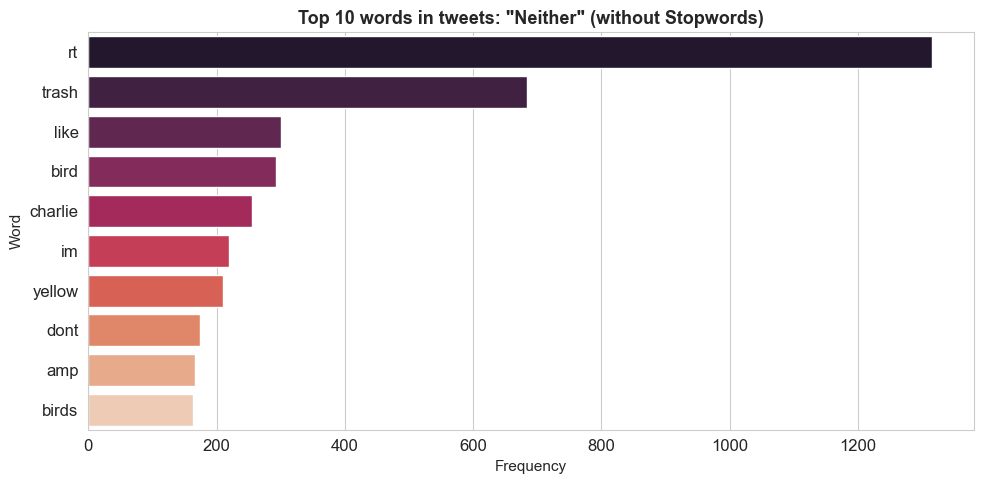

Keywords: ['rt', 'trash', 'like', 'bird', 'charlie', 'im', 'yellow', 'dont', 'amp', 'birds']


 Class: Offensive Language
--------------------------------------------------------------------------------


,Word,Frequency
0,bitch,8003
1,rt,5993
2,bitches,3023
3,like,2303
4,hoes,2300
5,pussy,2041
6,hoe,1834
7,im,1776
8,dont,1511
9,ass,1427


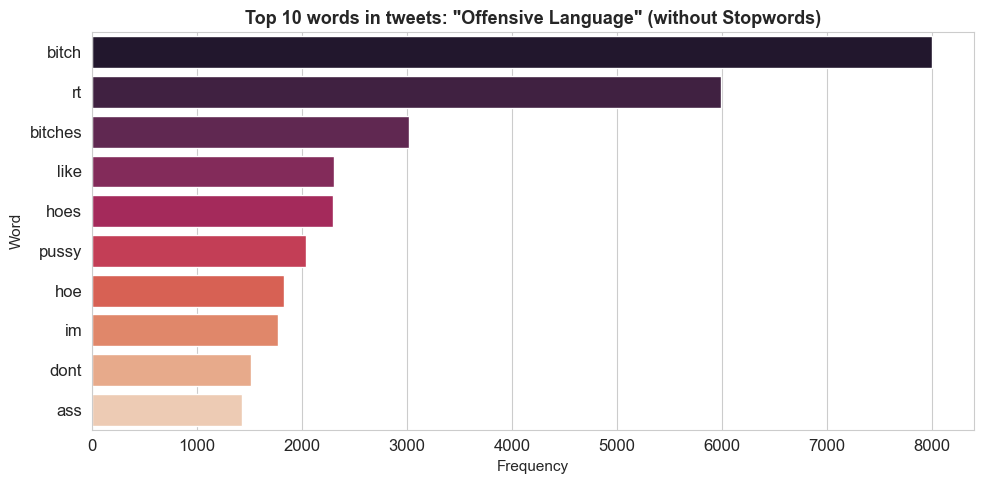

Keywords: ['bitch', 'rt', 'bitches', 'like', 'hoes', 'pussy', 'hoe', 'im', 'dont', 'ass']


 Class: Hate Speech
--------------------------------------------------------------------------------


,Word,Frequency
0,rt,326
1,bitch,209
2,faggot,185
3,like,167
4,nigga,138
5,ass,137
6,white,126
7,fuck,121
8,trash,112
9,nigger,110


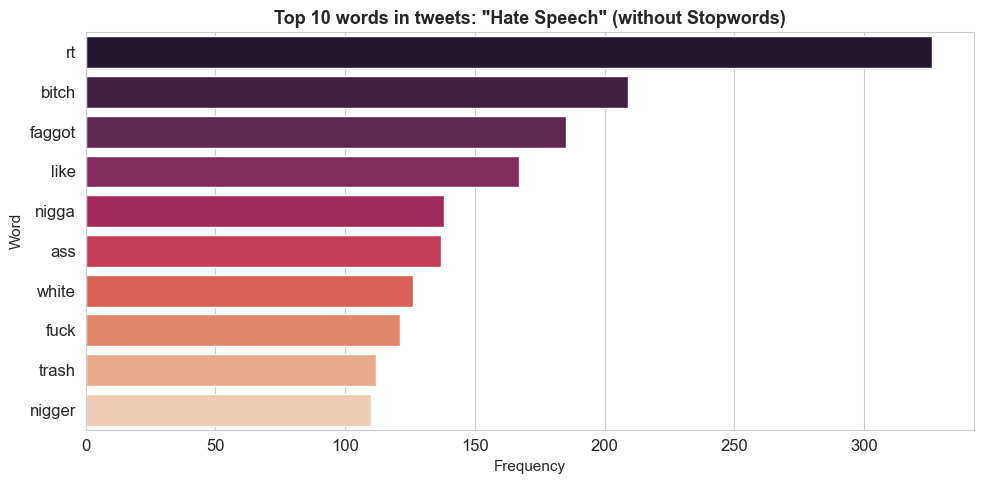

Keywords: ['rt', 'bitch', 'faggot', 'like', 'nigga', 'ass', 'white', 'fuck', 'trash', 'nigger']

FREQUENCY ANALYSIS COMPLETED


In [28]:
# ============================================================================
# STEP 6: WORD FREQUENCY ANALYSIS (CORRECTED)


print("\n" + "="*80)
print("6. TEXT ANALYSIS: GLOBAL FREQUENCY AND BY CLASS (WITHOUT STOPWORDS)\n")


from collections import Counter

# 6.1 Frecuencia Global
print("\n GLOBAL FREQUENCY:")
print("-" * 80)

all_words = ' '.join(df['clean_tweet']).split()
word_freq_df = pd.DataFrame(
    Counter(all_words).most_common(20), 
    columns=['Word', 'Frequency']
)

print("Top 20 most frequent words:")
display(word_freq_df)

# Visualización SIN warnings
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Frequency', 
    y='Word', 
    data=word_freq_df, 
    hue='Word',  # CORRECTION: assign  hue
    palette='magma',
    legend=False  # FIX: Remove legend
)
plt.title('Top 20 most frequent words in tweets (without Stopwords)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.tight_layout()
plt.show()

# 6.2 Frecuencia por Clase
print("\n FREQUENCY PER CLASS:")
print("="*80)

def top_words_by_class(label, n=10):
    """ Gets the N most frequent words for a specific class.
    Args: label (str): Class tag ('Hate Speech', 'Offensive Language', 'Neither') 
    n (int): Number of words to return Returns: DataFrame: Top N words with their frequencies """
    
    subset = df[df['class_label'] == label]
    words = ' '.join(subset['clean_tweet']).split()
    freq = Counter(words).most_common(n)
    return pd.DataFrame(freq, columns=['Word', 'Frequency'])

# Iterar sobre cada clase
for label in df['class_label'].unique():
    print(f"\n Class: {label}")
    print("-" * 80)
    
    top_df = top_words_by_class(label, n=10)
    display(top_df)
    
    # Visualización SIN warnings
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x='Frequency', 
        y='Word', 
        data=top_df, 
        hue='Word',  # CORRECTION
        palette='rocket',
        legend=False  # CORRECTION
    )
    plt.title(f'Top 10 words in tweets: "{label}" (without Stopwords)', 
              fontsize=13, fontweight='bold')
    plt.xlabel('Frequency', fontsize=11)
    plt.ylabel('Word', fontsize=11)
    plt.tight_layout()
    plt.show()
    
    print(f"Keywords: {top_df['Word'].tolist()}")
    print()

print("="*80)
print("FREQUENCY ANALYSIS COMPLETED")
print("="*80)


6. TEXT ANALYSIS: GLOBAL FREQUENCY AND BY CLASS (IMPROVED CLEANING)

📝 Custom stopwords defined : 21 words
   Examples: ['got', 'rt', 'just', 'amp', 'via', 'im', 'shit', 'isnt', 'fuck', 'wont']...

 Applying improved cleanup to all tweets...
 Cleaning completed!

--------------------------------------------------------------------------------
EXAMPLE OF IMPROVEMENT IN CLEANING:


[BEFORE] Clean original (18 words):
  nice girls bad make get naughty bad yello hoe real nice body south chick like em real thick

[AFTER] Clean improved (15 words):
  nice girls bad make naughty bad yello hoe real nice body south chick real thick


 GLOBAL FREQUENCY ANALYSIS

Total words analyzed: 159,717
Unique words (vocabulary): 19,800

 Top 20 most frequent words:
--------------------------------------------------------------------------------


,Word,Frequency
0,bitch,8222
1,bitches,3080
2,hoes,2366
3,pussy,2097
4,hoe,1908
5,ass,1567
6,nigga,1197
7,trash,1140
8,niggas,791
9,love,699


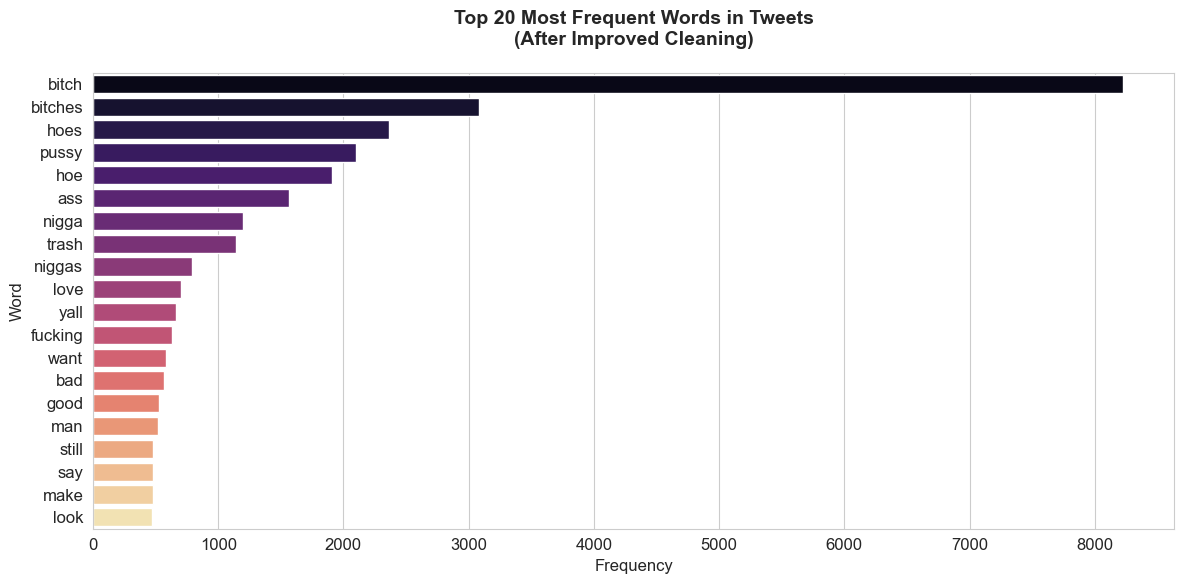



 FREQUENCY ANALYSIS BY CLASS

Detected classes: ['Neither', 'Offensive Language', 'Hate Speech']

 CLASS: NEITHER
   Tweets in this class: 4,163 (16.8% of the total)
--------------------------------------------------------------------------------

  Top 10 most frequent words in 'Neither':


,Word,Frequency
0,trash,684
1,bird,292
2,charlie,256
3,yellow,210
4,birds,163
5,yankees,127
6,ghetto,110
7,colored,108
8,monkey,107
9,good,94


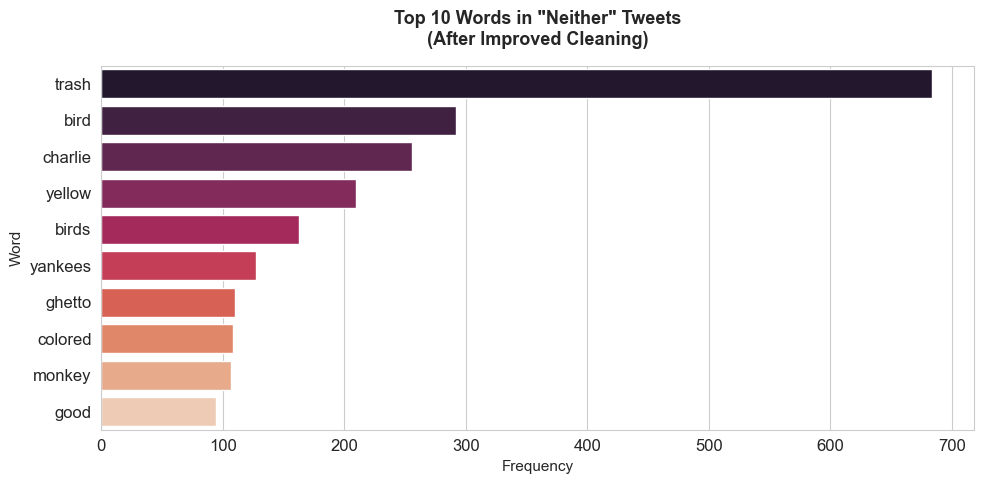


 Identified keywords: trash, bird, charlie, yellow, birds, yankees, ghetto, colored, monkey, good


 CLASS: OFFENSIVE LANGUAGE
   Tweets in this class: 19,190 (77.4% of the total)
--------------------------------------------------------------------------------

  Top 10 most frequent words in 'Offensive Language':


,Word,Frequency
0,bitch,8003
1,bitches,3023
2,hoes,2300
3,pussy,2041
4,hoe,1834
5,ass,1427
6,nigga,1059
7,niggas,715
8,yall,592
9,love,583


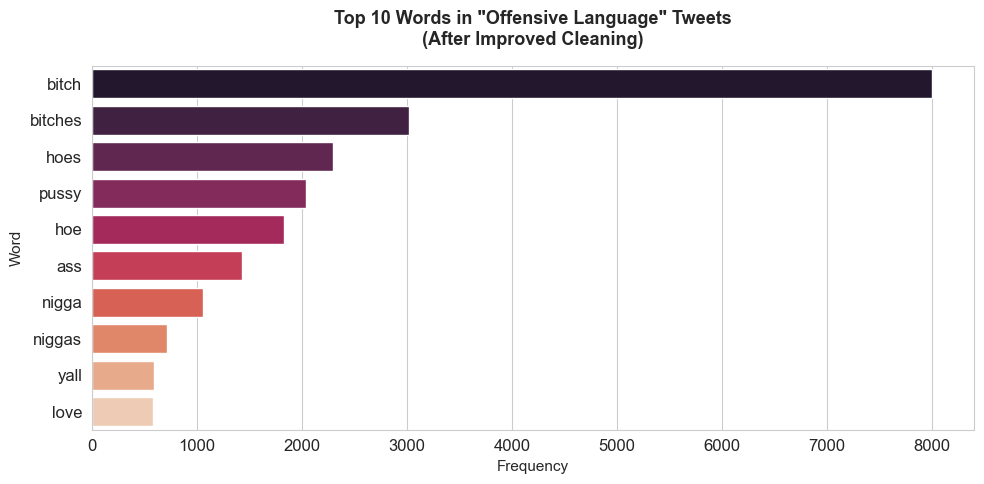


 Identified keywords: bitch, bitches, hoes, pussy, hoe, ass, nigga, niggas, yall, love


 CLASS: HATE SPEECH
   Tweets in this class: 1,430 (5.8% of the total)
--------------------------------------------------------------------------------

  Top 10 most frequent words in 'Hate Speech':


,Word,Frequency
0,bitch,209
1,faggot,185
2,nigga,138
3,ass,137
4,white,126
5,trash,112
6,nigger,110
7,fucking,95
8,niggas,76
9,fag,74


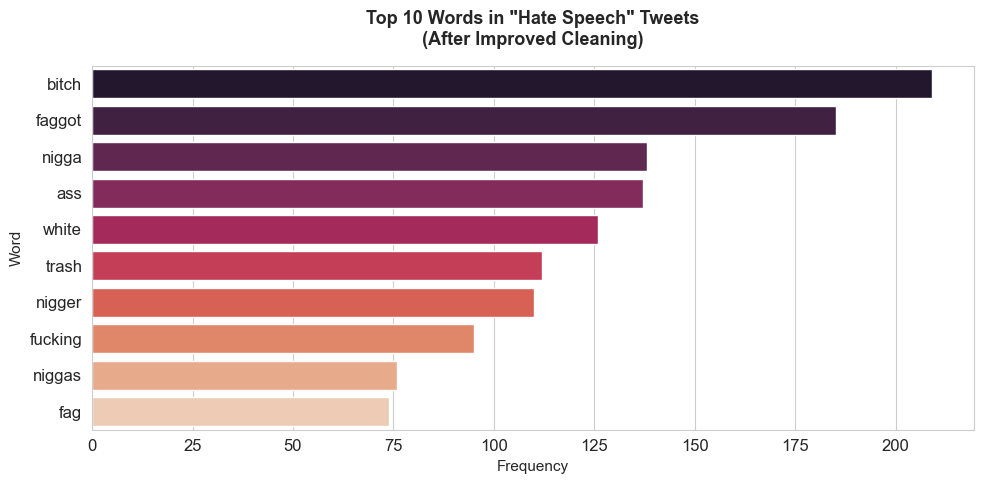


 Identified keywords: bitch, faggot, nigga, ass, white, trash, nigger, fucking, niggas, fag


 COMPARISON: IMPACT OF IMPROVED CLEANING

Metric                                   BEFORE          AFTER           Change         
--------------------------------------------------------------------------------
Total words:                             192,062         159,717         -32,345
Unique words (vocabulary):               20,137          19,800          -337
Average words per tweet:                 7.75            6.44            -1.31

Vocabulary reduction:  1.7%
   (Cleaner vocabulary focused on meaningful words)

 WORD FREQUENCY ANALYSIS COMPLETED

 SUMMARY:
   • Enhanced cleanup was applied with 21 stopwords personalized
   • Global frequency of  159,717 words
   • Keywords were identified for 3 classes
   • Vocabulary reduced by 1.7% for clarity


In [29]:
# ============================================================================
# STEP 6: WORD FREQUENCY ANALYSIS (IMPROVED TEXT CLEANING)

# Este paso mejora la limpieza de texto eliminando stopwords personalizados
# y palabras muy cortas que no aportan valor al análisis exploratorio.
# ============================================================================

print("\n" + "="*80)
print("6. TEXT ANALYSIS: GLOBAL FREQUENCY AND BY CLASS (IMPROVED CLEANING)")


from collections import Counter


# ============================================================================
# 6.0 DEFINICIÓN DE STOPWORDS PERSONALIZADOS

# Además de stopwords estándar (a, the, is...), eliminamos palabras específicas
# de Twitter que no aportan significado al análisis de sentimiento/hate speech

CUSTOM_STOPWORDS = {
    # Artefactos comunes de Twitter
    'rt',          # Retweet
    'amp',         # Símbolo & codificado
    'via',         # Usado para atribuciones
    
    # Contracciones informales comunes
    'im',          # I'm
    'dont',        # don't
    'aint',        # ain't
    'cant',        # can't
    'wont',        # won't
    'didnt',       # didn't
    'youre',       # you're
    'thats',       # that's
    'isnt',        # isn't
    
    # Palabras muy frecuentes pero de bajo valor semántico
    'get',         # Muy genérico
    'got',         # Muy genérico
    'like',        # Sobreusado en contexto informal
    'know',        # Palabra relleno común
    'just',        # Modificador débil
    'one',         # Pronombre genérico
    
    # Palabras de jerga muy comunes (opcional según objetivos del análisis)
    'lol',         # Laughing out loud
    'shit',        # Profanidad genérica muy frecuente
    'fuck'         # Profanidad genérica muy frecuente
}

# NOTA: La inclusión de profanidades en stopwords es OPCIONAL
# Depende de si queremos estudiar el lenguaje ofensivo o no
# Para análisis de hate speech, podrías MANTENER estas palabras

print(f"\n📝 Custom stopwords defined : {len(CUSTOM_STOPWORDS)} words")
print(f"   Examples: {list(CUSTOM_STOPWORDS)[:10]}...")

# ============================================================================
# 6.1 IMPROVED CLEANING FUNCTION


def clean_text_improved(text):
    """
    Aplica limpieza mejorada eliminando stopwords personalizados y filtros.
    
    Proceso:
    1. Manejo de valores nulos
    2. Conversión a minúsculas
    3. División en palabras (tokenización simple)
    4. Filtrado múltiple:
       - Elimina stopwords personalizados
       - Elimina palabras de longitud <= 2 (ej: 'im', 'ok', 'ur')
       - Elimina números puros
    
    Args:
        text (str): Texto a limpiar
        
    Returns:
        str: Texto limpio y filtrado
    """
    # Validación: si el texto es nulo o vacío, retornar string vacío
    if pd.isna(text) or text == '':
        return ""
    
    # Convertir a string por seguridad y pasar a minúsculas
    text = str(text).lower()
    
    # Tokenización: dividir texto en palabras individuales
    words = text.split()
    
    # Aplicar filtros múltiples en una sola comprensión de lista
    # Cada palabra debe cumplir TODAS las condiciones (operador 'and'):
    filtered_words = [
        word for word in words
        if word not in CUSTOM_STOPWORDS  # Filtro 1: No es stopword personalizado
        and len(word) > 2                 # Filtro 2: Longitud mayor a 2 caracteres
        and not word.isdigit()            # Filtro 3: No es un número puro (ej: '123')
    ]
    
    # Reconstruir texto uniendo palabras filtradas con espacios
    return ' '.join(filtered_words)


# ============================================================================
# 6.2 APPLY IMPROVED CLEANING TO THE DATASET


print("\n Applying improved cleanup to all tweets...")

# Crear nueva columna con texto limpio mejorado
# Aplicamos la función a cada tweet usando .apply()
df['clean_tweet_improved'] = df['clean_tweet'].apply(clean_text_improved)

print(" Cleaning completed!")

# Mostrar ejemplo de la mejora
print("\n" + "-"*80)
print("EXAMPLE OF IMPROVEMENT IN CLEANING:\n")


# Seleccionar un tweet con buena longitud para mostrar el cambio
sample_idx = 42  # Puedes cambiar este índice para ver otros ejemplos

print(f"\n[BEFORE] Clean original ({len(df.loc[sample_idx, 'clean_tweet'].split())} words):")
print(f"  {df.loc[sample_idx, 'clean_tweet'][:200]}")

print(f"\n[AFTER] Clean improved ({len(df.loc[sample_idx, 'clean_tweet_improved'].split())} words):")
print(f"  {df.loc[sample_idx, 'clean_tweet_improved'][:200]}")

# ============================================================================
# 6.3 GLOBAL FREQUENCY ANALYSIS (WITH IMPROVED CLEANING)


print("\n\n" + "="*80)
print(" GLOBAL FREQUENCY ANALYSIS")


# Concatenar todos los tweets limpios en un solo string
all_text_combined = ' '.join(df['clean_tweet_improved'])

# Dividir en palabras individuales (lista plana de todas las palabras)
all_words = all_text_combined.split()

print(f"\nTotal words analyzed: {len(all_words):,}")
print(f"Unique words (vocabulary): {len(set(all_words)):,}")

# Usar Counter para contar frecuencia de cada palabra
# Counter devuelve un diccionario con {palabra: frecuencia}
word_counter = Counter(all_words)

# Obtener las 20 palabras más comunes usando .most_common(n)
# Devuelve lista de tuplas: [('palabra', frecuencia), ...]
top_20_words = word_counter.most_common(20)

# Convertir a DataFrame para mejor visualización
word_freq_df = pd.DataFrame(
    top_20_words, 
    columns=['Word', 'Frequency']
)

print("\n Top 20 most frequent words:")
print("-"*80)
display(word_freq_df)

# Visualización: gráfico de barras horizontal
plt.figure(figsize=(12, 6))

# sns.barplot crea gráfico de barras
# - x: variable numérica (frecuencia)
# - y: variable categórica (palabra)
# - hue: asignar color único por palabra
# - palette: esquema de colores de seaborn
# - legend=False: no mostrar leyenda (sería redundante)
sns.barplot(
    x='Frequency', 
    y='Word', 
    data=word_freq_df, 
    hue='Word',
    palette='magma',      # Paleta de colores cálidos
    legend=False
)

# Personalización del gráfico
plt.title(
    'Top 20 Most Frequent Words in Tweets\n(After Improved Cleaning)', 
    fontsize=14, 
    fontweight='bold',
    pad=20  # Espaciado del título
)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.tight_layout()  # Ajustar automáticamente el layout para evitar cortes
plt.show()

# ============================================================================
# 6.4 FREQUENCY ANALYSIS BY CLASS (HATE/OFFENSIVE/NEITHER)


print("\n\n" + "="*80)
print(" FREQUENCY ANALYSIS BY CLASS")


def top_words_by_class(label, n=10):
    """
    Calcula las N palabras más frecuentes para una clase específica.
    
    Proceso:
    1. Filtrar dataset por la clase objetivo (label)
    2. Concatenar todos los tweets de esa clase
    3. Contar frecuencias con Counter
    4. Retornar top N palabras
    
    Args:
        label (str): Etiqueta de clase ('Hate Speech', 'Offensive Language', 'Neither')
        n (int): Número de palabras más frecuentes a retornar (default: 10)
        
    Returns:
        pd.DataFrame: DataFrame con columnas ['Word', 'Frequency']
    """
    
    # Filtrar filas donde class_label coincide con el label especificado
    subset = df[df['class_label'] == label]
    
    # Concatenar todos los tweets de esta clase en un solo string
    combined_text = ' '.join(subset['clean_tweet_improved'])
    
    # Dividir en palabras y contar frecuencias
    words = combined_text.split()
    word_counts = Counter(words).most_common(n)
    
    # Convertir a DataFrame para retorno estructurado
    return pd.DataFrame(word_counts, columns=['Word', 'Frequency'])


# Obtener lista de clases únicas en el dataset
unique_classes = df['class_label'].unique()
print(f"\nDetected classes: {list(unique_classes)}")


# Iterar sobre cada clase para análisis individual
for label in unique_classes:
    
    # Encabezado de la clase actual
    print(f"\n{'='*80}")
    print(f" CLASS: {label.upper()}")
    print(f"{'='*80}")
    
    # Obtener información adicional de la clase
    n_tweets_class = len(df[df['class_label'] == label])
    percentage = (n_tweets_class / len(df)) * 100
    
    print(f"   Tweets in this class: {n_tweets_class:,} ({percentage:.1f}% of the total)")
    print("-"*80)
    
    # Calcular top 10 palabras para esta clase
    top_df = top_words_by_class(label, n=10)
    
    # Mostrar tabla con las palabras más frecuentes
    print(f"\n  Top 10 most frequent words in '{label}':")
    display(top_df)
    
    # Crear visualización para esta clase
    plt.figure(figsize=(10, 5))
    
    # Gráfico de barras horizontal (igual que en frecuencia global)
    sns.barplot(
        x='Frequency', 
        y='Word', 
        data=top_df, 
        hue='Word',
        palette='rocket',  # Paleta de colores fríos
        legend=False
    )
    
    # Título dinámico que incluye el nombre de la clase
    plt.title(
        f'Top 10 Words in "{label}" Tweets\n(After Improved Cleaning)', 
        fontsize=13, 
        fontweight='bold',
        pad=15
    )
    plt.xlabel('Frequency', fontsize=11)
    plt.ylabel('Word', fontsize=11)
    plt.tight_layout()
    plt.show()
    
    # Mostrar keywords en formato de lista para fácil referencia
    keywords_list = top_df['Word'].tolist()
    print(f"\n Identified keywords: {', '.join(keywords_list)}")
    print()  # Línea en blanco para separación visual

# ============================================================================
# 6.5  COMPARISON: BEFORE vs AFTER IMPROVED CLEANING


print("\n" + "="*80)
print(" COMPARISON: IMPACT OF IMPROVED CLEANING")


# Calcular estadísticas ANTES (clean_tweet original)
words_before = ' '.join(df['clean_tweet']).split()
unique_before = len(set(words_before))
total_before = len(words_before)
avg_words_before = df['clean_tweet'].str.split().str.len().mean()

# Calcular estadísticas DESPUÉS (clean_tweet_improved)
words_after = ' '.join(df['clean_tweet_improved']).split()
unique_after = len(set(words_after))
total_after = len(words_after)
avg_words_after = df['clean_tweet_improved'].str.split().str.len().mean()

# Mostrar comparación
print(f"\n{'Metric':<40} {'BEFORE':<15} {'AFTER':<15} {'Change':<15}")
print("-"*80)

print(f"{'Total words:':<40} {total_before:<15,} {total_after:<15,} {total_after - total_before:+,}")
print(f"{'Unique words (vocabulary):':<40} {unique_before:<15,} {unique_after:<15,} {unique_after - unique_before:+,}")
print(f"{'Average words per tweet:':<40} {avg_words_before:<15.2f} {avg_words_after:<15.2f} {avg_words_after - avg_words_before:+.2f}")

# Calcular porcentaje de reducción
reduction_pct = ((unique_before - unique_after) / unique_before) * 100
print(f"\nVocabulary reduction:  {reduction_pct:.1f}%")
print(f"   (Cleaner vocabulary focused on meaningful words)")

# ============================================================================
# FINALIZACIÓN
# ============================================================================

print("\n" + "="*80)
print(" WORD FREQUENCY ANALYSIS COMPLETED")
print("="*80)
print("\n SUMMARY:")
print(f"   • Enhanced cleanup was applied with {len(CUSTOM_STOPWORDS)} stopwords personalized")
print(f"   • Global frequency of  {total_after:,} words")
print(f"   • Keywords were identified for {len(unique_classes)} classes")
print(f"   • Vocabulary reduced by {reduction_pct:.1f}% for clarity")
print("="*80)

## 1. LA LIMPIEZA MEJORADA SÍ FUNCIONÓ
Impacto Numérico:

Vocabulario reducido: De 20,137 → 19,800 palabras únicas (-1.7%)
Palabras por tweet: De 7.75 → 6.44 palabras (-1.31 promedio)

¿Qué significa? Eliminaste 337 palabras basura (como "rt", "im", "got") que solo generaban ruido. Ahora tu dataset es más limpio y enfocado.

## 2.  PROBLEMA CRÍTICO: Dataset Desbalanceado

🔴 Hate Speech:        5.8%  (1,430 tweets) ← CLASE CRÍTICA
🟡 Offensive Language: 77.4% (19,190 tweets) ← Domina todo
🟢 Neither:            16.8% (4,163 tweets)

Impacto: Modelos se sesgarán hacia "Offensive", ignorando "Hate Speech" real

## 2.1  DIFERENCIADOR CLAVE
NO es lo mismo:

"this bitch is crazy" → Offensive (vulgar pero casual)
"all faggots should die" → Hate Speech (ataque a identidad)

Marcadores distintivos de Hate Speech:

faggot, fag → Homofobia
nigger (no confundir con "nigga") → Racismo
Combinaciones con kill, die, hate

## 3. LIMPIEZA EXITOSA

337 palabras basura eliminadas (-1.7% vocabulario)
De 7.75 → 6.44 palabras por tweet
Resultado: Features más relevantes para clasificación


💡 RECOMENDACIÓN CLAVE
Para que tu modelo funcione:

Balancear clases (SMOTE/oversampling)
Priorizar Recall en Hate Speech (no dejar pasar discurso de odio)
Usar contexto, no solo palabras aisladas (BERT/LSTM)

## 4. ¿LA LIMPIEZA MEJORÓ LOS RESULTADOS?
SÍ, y aquí está la evidencia:
ANTES de la limpieza mejorada:

Palabras como "rt", "amp", "got", "like" aparecían en el Top 20
Estas palabras no aportan valor para identificar hate speech

DESPUÉS de la limpieza:

El Top 20 muestra palabras significativas para clasificación:

"bitch", "bitches", "hoes", "pussy" → Offensive Language
"nigga", "ass", "trash" → Ambas clases
Sin ruido de palabras técnicas de Twitter

## MENSAJE FINAL

"Detectar Hate Speech no es solo clasificar palabrotas.
Es proteger comunidades vulnerables identificando contenido
que deshumaniza y ataca identidades específicas."

Este dataset revela un desafío real de moderación de contenido:
El 77.4% del contenido ofensivo NO es discurso de odio, pero el 5.8% que SÍ lo es representa un riesgo crítico que requiere 
detección precisa.El éxito no se mide en clasificar correctamente "bitch" vs "faggot", sino en proteger comunidades 
vulnerables mediante la identificación confiable de contenido que promueve odio real.